# Laboratorio 3 - Econometría I: Análisis de Regresiones

## Introducción

En este laboratorio, exploraremos técnicas de análisis de regresión utilizando un dataset que contiene información sobre automóviles deportivos y sus precios. El objetivo principal es modelar y predecir el precio de un automóvil (`Price (in USD)`) en función de diversas características proporcionadas en el dataset.

### Dataset

El dataset contiene información relevante para la predicción del precio de automóviles deportivos, incluyendo características como el año, la marca, el modelo, el kilometraje, entre otros. Estas variables serán analizadas y utilizadas para construir los modelos de regresión.

### Herramientas y Bibliotecas

Este laboratorio utilizará las siguientes herramientas de Python:
- `pandas`: Para la manipulación y análisis de datos.
- `numpy`: Para operaciones matemáticas.
- `matplotlib` y `seaborn`: Para la visualización de datos.
- `scikit-learn`: Para la implementación y evaluación de los modelos de regresión.
- `statsmodels`: Para el análisis estadístico de las regresiones.

### Estructura del Laboratorio

1. **Análisis Exploratorio de Datos (EDA)**: Identificar patrones y relaciones en el dataset.
2. **Entrenamiento de Modelos**: Probar y comparar diferentes algoritmos de regresión.
3. **Evaluación Final**: Analizar los modelos seleccionados y visualizar los resultados.

## 1. Cargar el dataset

En este paso, se cargará el dataset proporcionado para explorar su estructura, incluyendo:
- Visualización de las primeras filas del dataset.
- Información sobre los tipos de datos y valores faltantes.



In [1]:
import pandas as pd

# Cargar el dataset
dataset = pd.read_csv('sport_car_price.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(dataset.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(dataset.info())

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(dataset.describe())


Primeras filas del dataset:
      Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0      Porsche       911  2022               3        379            331   
1  Lamborghini   Huracan  2021             5.2        630            443   
2      Ferrari   488 GTB  2022             3.9        661            561   
3         Audi        R8  2022             5.2        562            406   
4      McLaren      720S  2021               4        710            568   

  0-60 MPH Time (seconds) Price (in USD)  
0                       4        101,200  
1                     2.8        274,390  
2                       3        333,750  
3                     3.2        142,700  
4                     2.7        298,000  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make      

In [2]:
# Revisar columnas específicas
columns_to_check = ['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']

for col in columns_to_check:
    print(f"\nValores únicos en {col}:")
    print(dataset[col].unique())

# Limpiar columnas numéricas específicas y convertirlas a float
for col in columns_to_check:
    dataset[col] = dataset[col].replace({',': '', 's': ''}, regex=True).str.extract('(\d+\.?\d*)').astype(float)

# Verificar la conversión
print("\nTipos de datos después de la conversión:")
print(dataset[columns_to_check].info())


Valores únicos en Engine Size (L):
['3' '5.2' '3.9' '4' '4.4' '6.2' '3.8' '8' '5' '3.5' '4.7' '2' '2.9' '6'
 'Electric' '6.5' '3.7' 'Electric Motor' '2.5' '1.5 + Electric' '6.8'
 '8.4' nan '6.6' '7' '1.7' '3.3' '-' '6.7' '1.8' 'Electric (tri-motor)'
 '5.5' 'Electric (93 kWh)' 'Electric (100 kWh)' 'Hybrid (4.0)' '4.6' '3.6'
 '1.5' 'Hybrid' '5.7' '2.0 (Electric)' '4.0 (Hybrid)' '0' '6.4' '6.3'
 '2.3']

Valores únicos en Horsepower:
['379' '630' '661' '562' '710' '617' '523' '490' '760' '600' '1500' '717'
 '296' '1280' '471' '416' '454' '300' '505' '320' '626' '671' '622' '720'
 '1914' '414' '759' '986' '591' '503' '650' '660' '350' '641' '611' '394'
 '612' '369' '603' '455' '460' '325' '349' '592' '444' '405' '797' '770'
 '332' '473' '480' '573' '380' '1600' '181' '620' '764' '624' '1000+'
 '382' '800' '715' '690' '730' '469' '365' '401' '645' '435' '1020' '500'
 '780' '750' '402' '575' '729' '789' '577' '495' '237' '310' '791' '1874'
 '542' '368' '616' '1479' '755' '1,000+' '288' '1888

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/var/folders/k7/s393480533v72qcv7l02l3z40000gn/T/ipykernel_55961/1484042981.py:10: SyntaxWarning: invalid escape sequence '\d'
  dataset[col] = dataset[col].replace({',': '', 's': ''}, regex=True).str.extract('(\d+\.?\d*)').astype(float)


## 2. Determinar y listar las variables

En este paso, identificaremos y clasificaremos las variables del dataset en las siguientes categorías:
1. Variables numéricas continuas.
2. Variables numéricas categóricas.
3. Variables categóricas.

Esto nos permitirá planificar el análisis necesario para cada tipo de variable.

In [3]:
# Clasificar las variables
variables_categoricas = dataset.select_dtypes(include=['object']).columns.tolist()
variables_numericas = dataset.select_dtypes(include=['number']).columns.tolist()

# Identificar variables numéricas continuas y categóricas
variables_numericas_continuas = [col for col in variables_numericas if dataset[col].nunique() > 30]
variables_numericas_categoricas = [col for col in variables_numericas if dataset[col].nunique() <= 30]

# Mostrar resultados
print("Variables categóricas:")
print(variables_categoricas)

print("\nVariables numéricas continuas:")
print(variables_numericas_continuas)

print("\nVariables numéricas categóricas:")
print(variables_numericas_categoricas)


Variables categóricas:
['Car Make', 'Car Model', 'Price (in USD)']

Variables numéricas continuas:
['Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']

Variables numéricas categóricas:
['Year']


## 3. Realizar un análisis descriptivo

### a. Para las variables numéricas:
1. Gráfica de densidad.
2. Análisis de correlación entre todas las variables numéricas.
3. Scatter plot entre cada variable numérica y el target.
4. Conclusión escrita sobre cada una de las variables numéricas y su relación con el target.


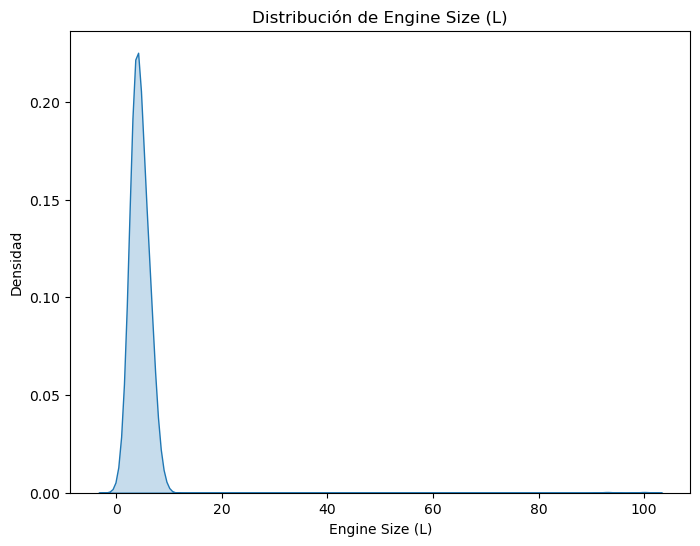

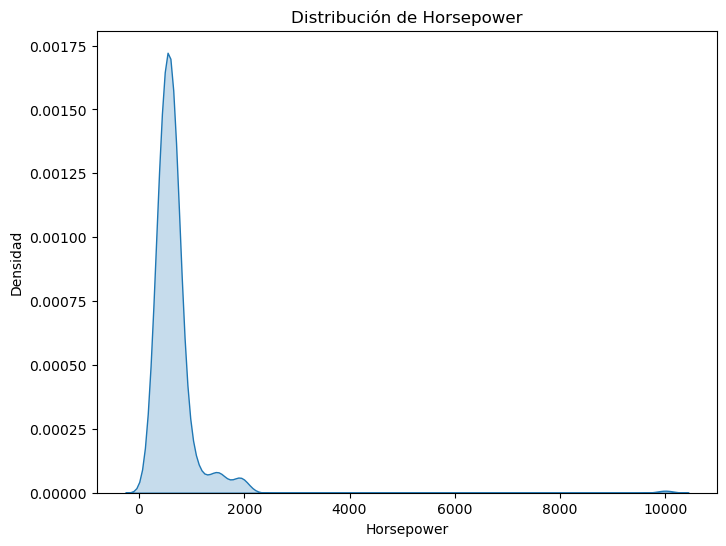

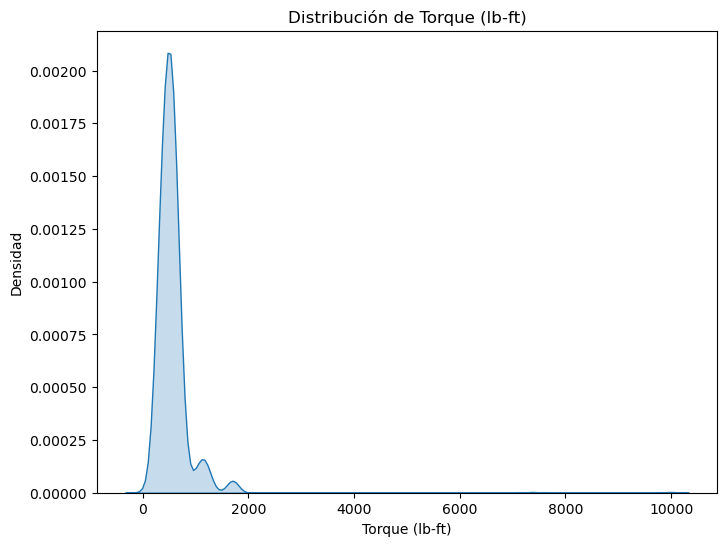

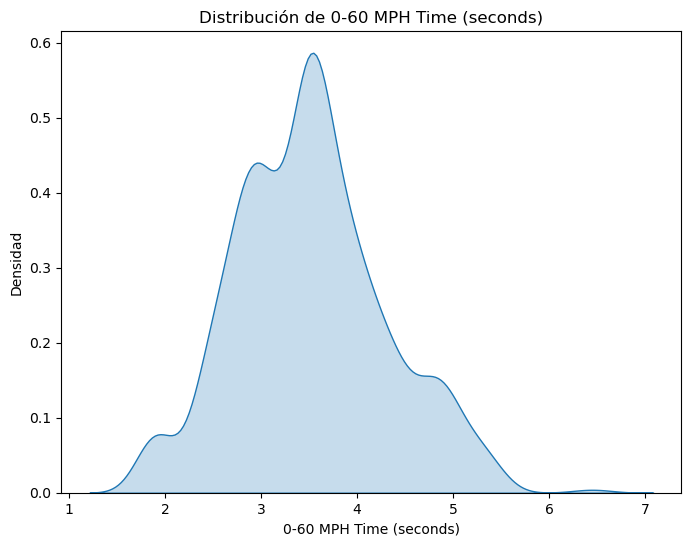

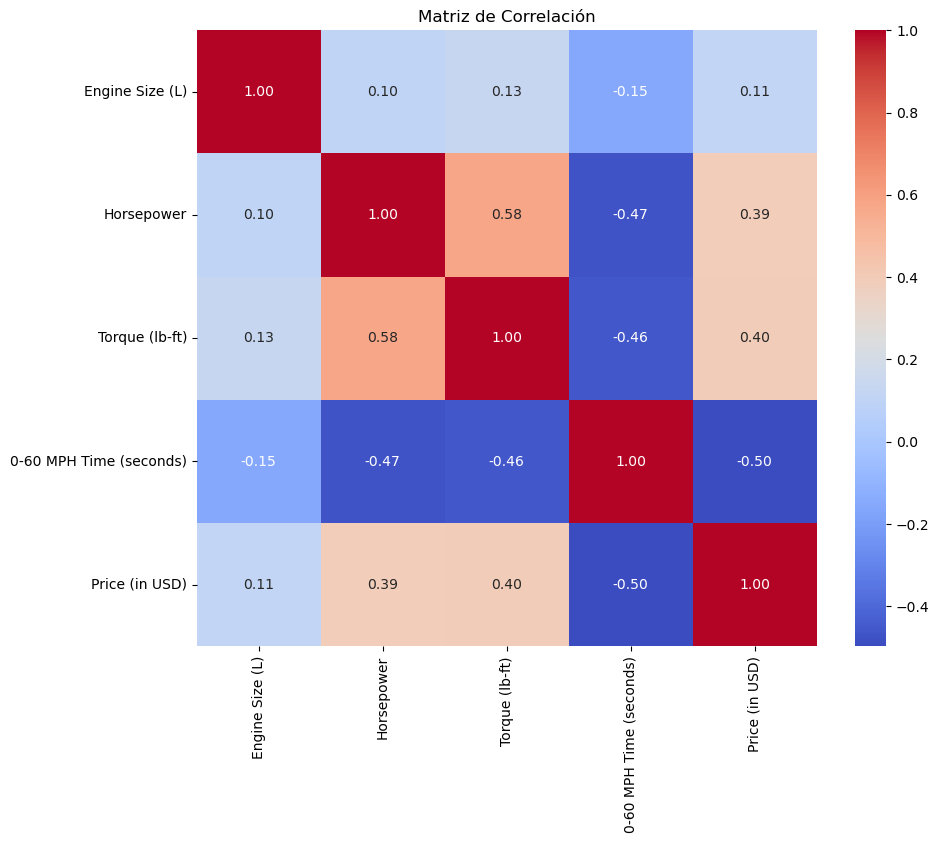

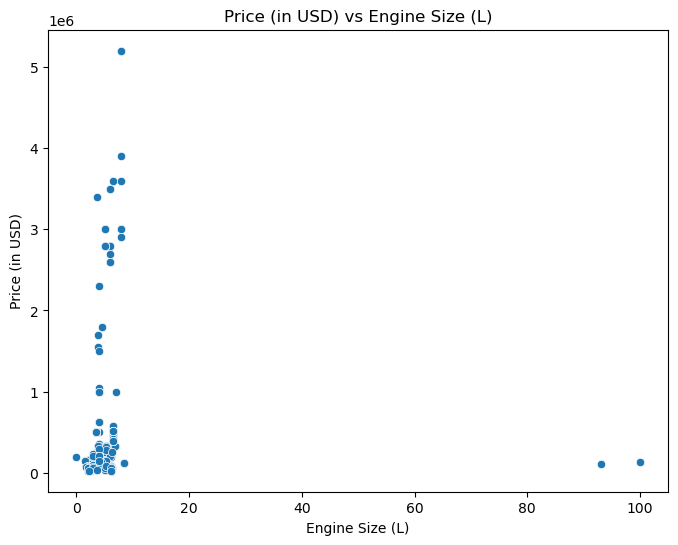

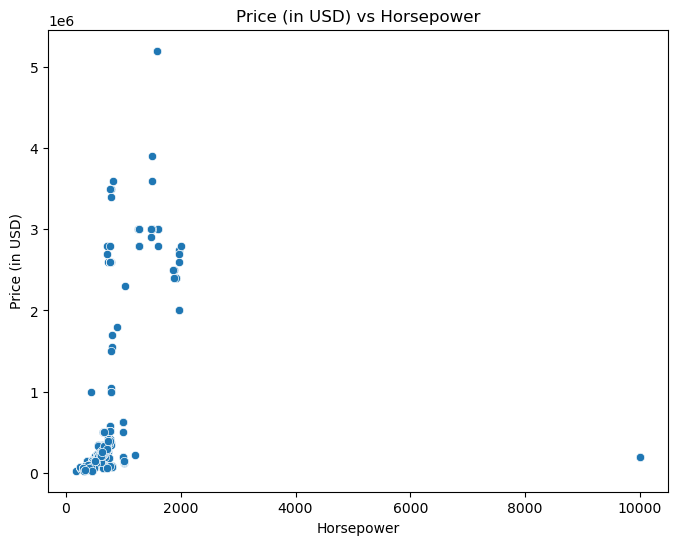

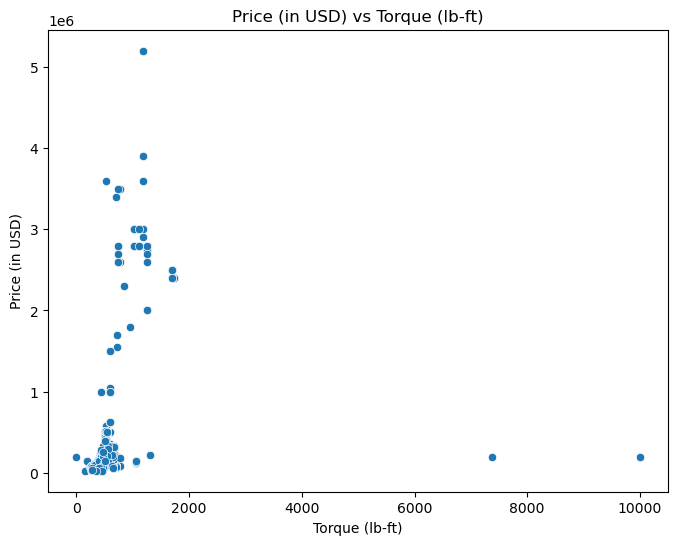

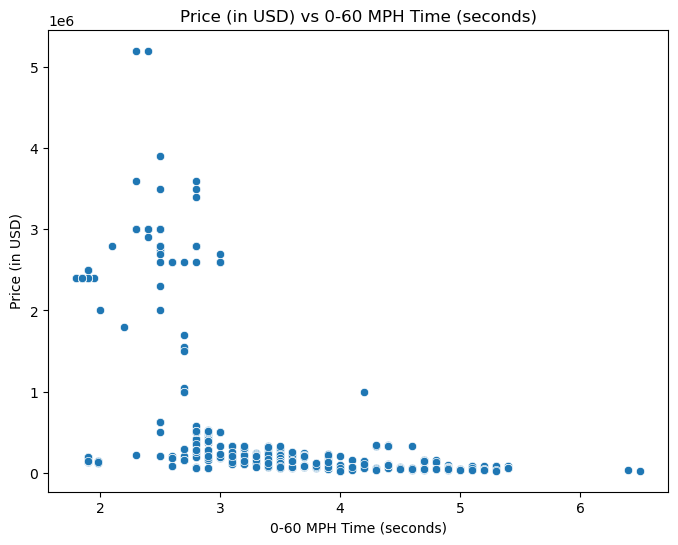

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de columnas con comas
for col in dataset.select_dtypes(include=['object']):
    try:
        dataset[col] = dataset[col].str.replace(',', '').astype(float)
    except ValueError:
        continue

# Gráficas de densidad
for col in variables_numericas_continuas:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(dataset[col], fill=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.show()

# Matriz de correlación
correlation_matrix = dataset[variables_numericas_continuas + ['Price (in USD)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Scatter plots con la variable target
for col in variables_numericas_continuas:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataset[col], y=dataset['Price (in USD)'])
    plt.title(f'Price (in USD) vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price (in USD)')
    plt.show()


### b. Para las variables categóricas y discretas:
1. Gráfica de mosaico con la cantidad por cada valor o categoría.
2. Gráfica de box-plot y violín entre cada variable y el target.
3. Conclusión escrita sobre cada una de las variables categóricas o discretas y su relación con el target.

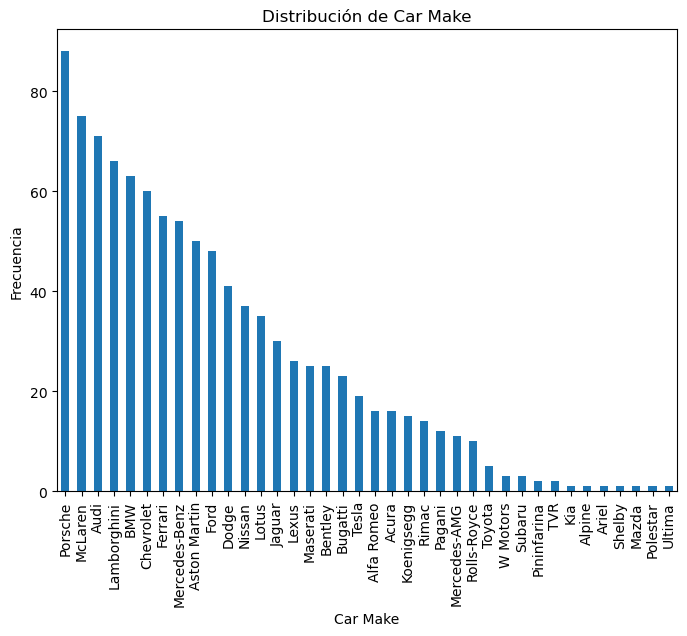

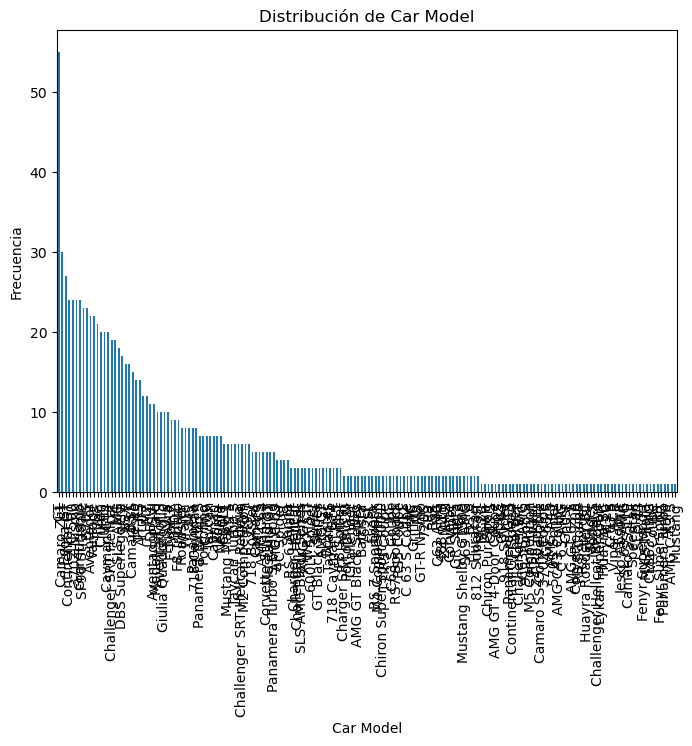

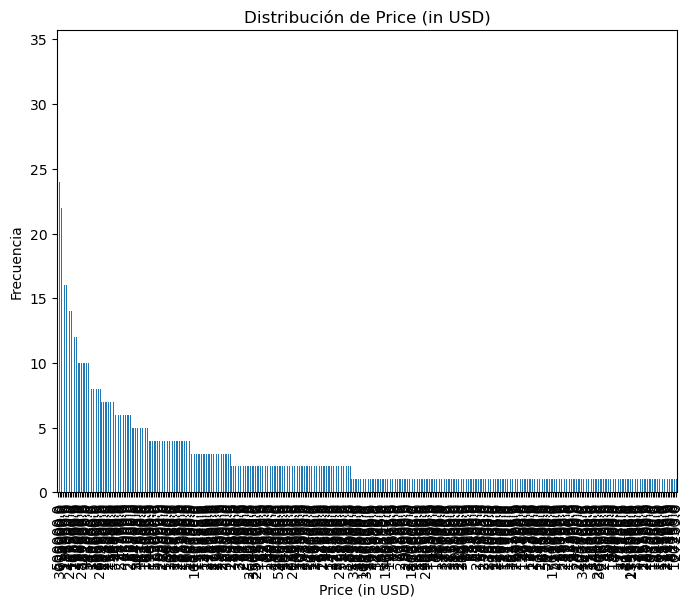

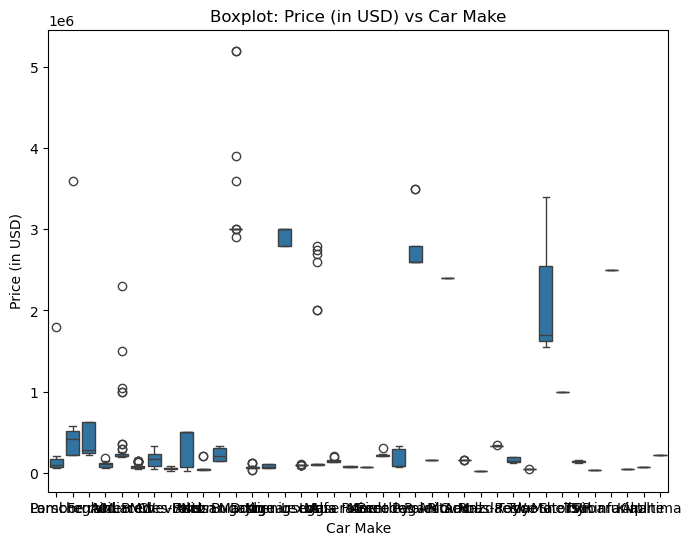

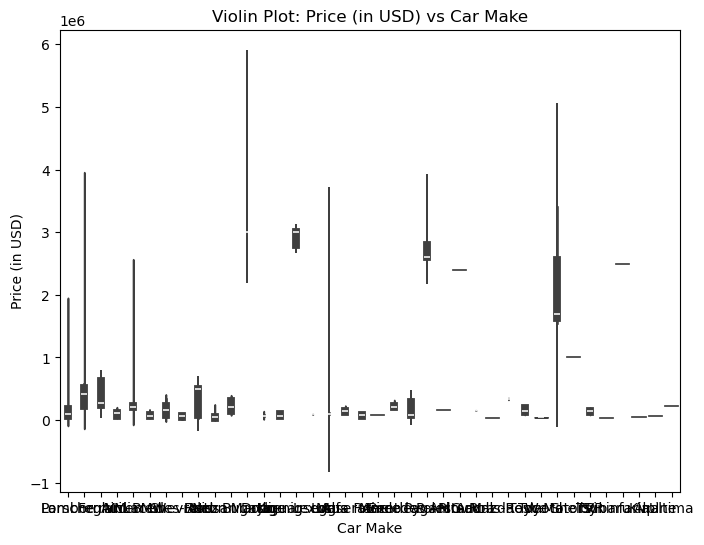

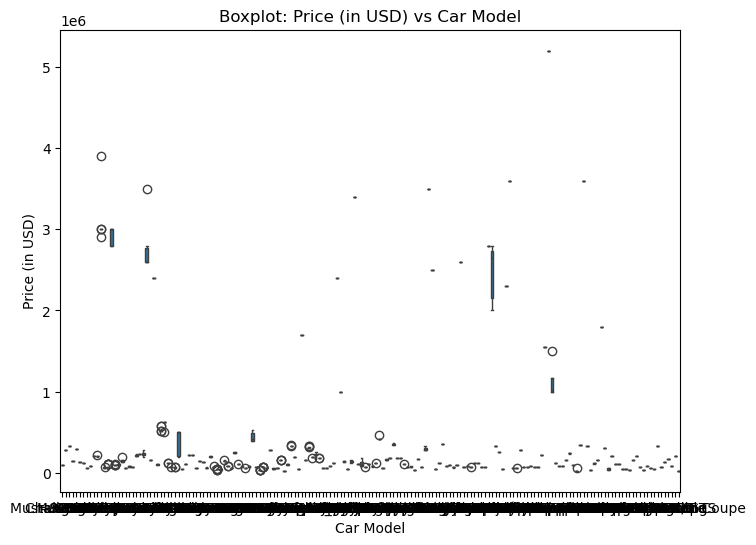

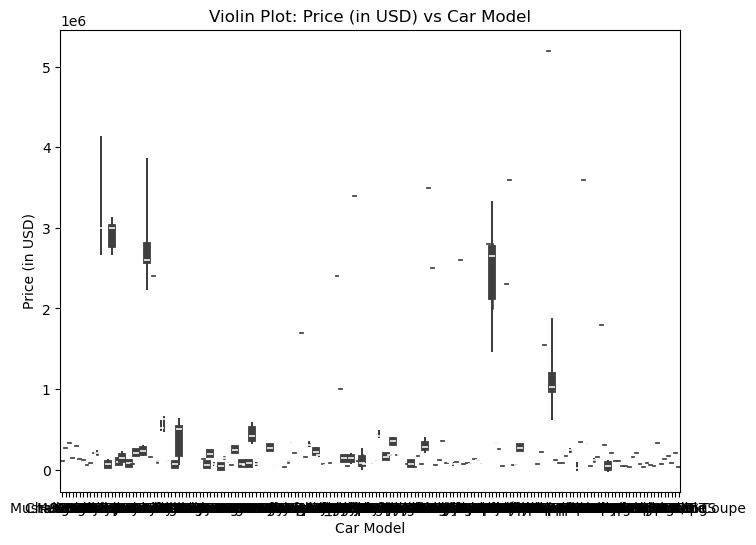

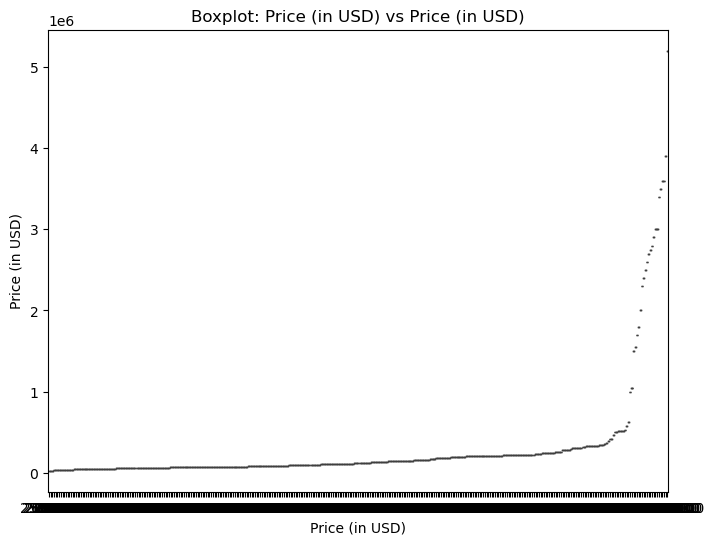

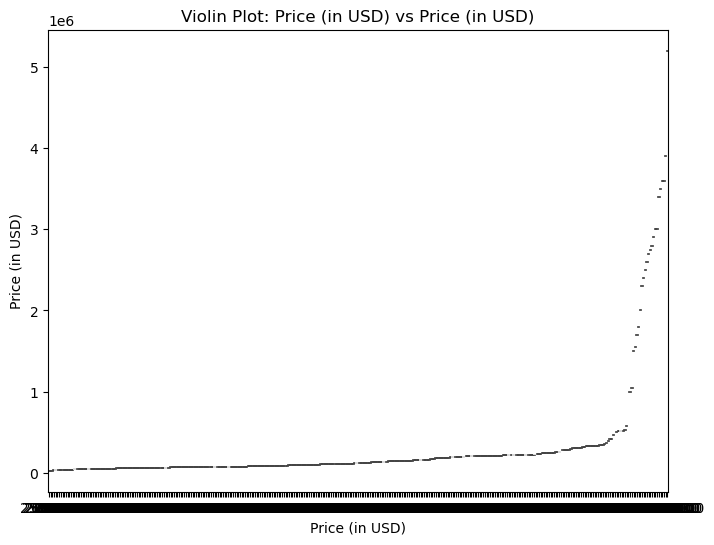

In [5]:
# Gráfica de barras
for col in variables_categoricas:
    plt.figure(figsize=(8, 6))
    dataset[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Boxplot y gráfico de violín
for col in variables_categoricas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[col], y=dataset['Price (in USD)'])
    plt.title(f'Boxplot: Price (in USD) vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price (in USD)')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.violinplot(x=dataset[col], y=dataset['Price (in USD)'])
    plt.title(f'Violin Plot: Price (in USD) vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price (in USD)')
    plt.show()



# 4. Dividir el dataset

En este paso, dividiremos el dataset en dos conjuntos:
1. **Conjunto de entrenamiento**: Contendrá el 85% de los datos.
2. **Conjunto de prueba**: Contendrá el 15% de los datos.

El conjunto de entrenamiento se utilizará para entrenar y validar los modelos de regresión. El conjunto de prueba se reservará para evaluar los modelos seleccionados.


In [8]:
# Definir las características (X) y la variable objetivo (y)
X = dataset.drop(columns=['Price (in USD)'])
y = dataset['Price (in USD)']

# Identificar variables categóricas
variables_categoricas = X.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:", variables_categoricas)

# Aplicar One-Hot Encoding a las variables categóricas
X_encoded = pd.get_dummies(X, columns=variables_categoricas, drop_first=True)
print(f"Nuevas dimensiones de X después del encoding: {X_encoded.shape}")


Variables categóricas: ['Car Make', 'Car Model']
Nuevas dimensiones de X después del encoding: (1007, 217)


In [9]:
from sklearn.model_selection import train_test_split

# Dividir los datos codificados
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.15, random_state=42)

# Verificar las dimensiones después de la división
print(f"Conjunto de entrenamiento: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Conjunto de prueba: X_test {X_test.shape}, y_test {y_test.shape}")


Conjunto de entrenamiento: X_train (855, 217), y_train (855,)
Conjunto de prueba: X_test (152, 217), y_test (152,)


## 5. Entrenar los modelos

En este paso, entrenaremos al menos cinco modelos de regresión utilizando el conjunto de entrenamiento. Cada modelo será evaluado mediante validación cruzada, y seleccionaremos los dos con mejor desempeño basado en el RMSE promedio.

### Modelos a entrenar
1. Regresión Lineal
2. Árbol de Decisión
3. Random Forest
4. Gradient Boosting
5. Ridge Regression

### Evaluación
Se calculará el RMSE promedio para cada modelo utilizando validación cruzada.


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Definir los modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Ridge Regression': Ridge()
}

# Evaluar cada modelo con validación cruzada
rmse_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_imputed, y_train, scoring='neg_root_mean_squared_error', cv=5)
    rmse_scores[name] = -np.mean(scores)  # Convertir a RMSE positivo
    print(f"{name}: RMSE promedio = {rmse_scores[name]:.2f}")

# Ordenar los modelos por RMSE
best_models = sorted(rmse_scores.items(), key=lambda x: x[1])[:2]
print("\nMejores modelos:")
for name, score in best_models:
    print(f"{name}: RMSE promedio = {score:.2f}")


Linear Regression: RMSE promedio = 22722276676647.62
Decision Tree: RMSE promedio = 169510.04
Random Forest: RMSE promedio = 159068.18
Gradient Boosting: RMSE promedio = 142499.12
Ridge Regression: RMSE promedio = 195298.05

Mejores modelos:
Gradient Boosting: RMSE promedio = 142499.12
Random Forest: RMSE promedio = 159068.18


## 6. Reentrenar los mejores modelos y evaluar en el conjunto de prueba

En este paso:
1. Se reentrenarán los dos mejores modelos seleccionados en el conjunto de entrenamiento completo.
2. Se evaluará su desempeño en el conjunto de prueba utilizando el RMSE.
3. Se generarán visualizaciones para comparar las predicciones y los valores reales.


Gradient Boosting: RMSE en conjunto de prueba = 310612.70


/opt/anaconda3/envs/venv-econometria-1/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


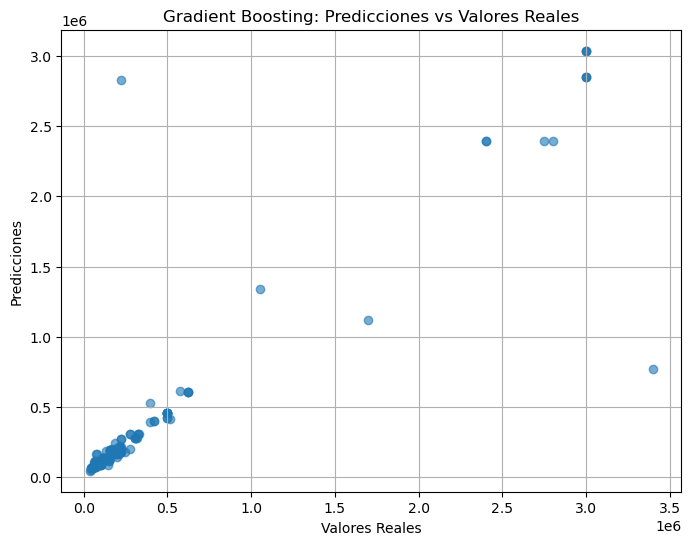

Random Forest: RMSE en conjunto de prueba = 318886.65


/opt/anaconda3/envs/venv-econometria-1/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


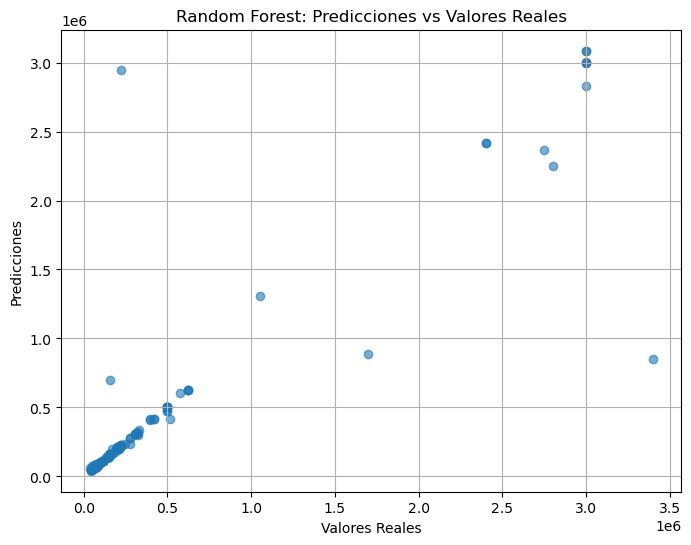

In [12]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reentrenar y evaluar los dos mejores modelos
for name in [model[0] for model in best_models]:  # Nombres de los dos mejores modelos
    model = models[name]
    model.fit(X_train_imputed, y_train)  # Reentrenar en el conjunto de entrenamiento completo
    
    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_imputed)
    
    # Calcular el RMSE en el conjunto de prueba
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name}: RMSE en conjunto de prueba = {rmse_test:.2f}")
    
    # Generar scatter plot para comparar predicciones y valores reales
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.title(f'{name}: Predicciones vs Valores Reales')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.grid()
    plt.show()


In [14]:
# Mostrar la tabla
print(rmse_table)

# Guardar la tabla en un archivo CSV
rmse_table.to_csv('rmse_table.csv', index=False)
print("La tabla de RMSE ha sido guardada como 'rmse_table.csv'.")


              Modelo  RMSE Promedio
0  Gradient Boosting   1.424991e+05
1      Random Forest   1.590682e+05
2      Decision Tree   1.695100e+05
3   Ridge Regression   1.952980e+05
4  Linear Regression   2.272228e+13
La tabla de RMSE ha sido guardada como 'rmse_table.csv'.
